In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
df=pd.read_csv('Electric_Production.csv',index_col=0)
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [3]:
df.index=pd.to_datetime(df.index)

In [4]:
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [5]:
df.columns=['Energy Production']
df

,Energy Production
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


Text(0.5, 1.0, 'Energy Production Per year')

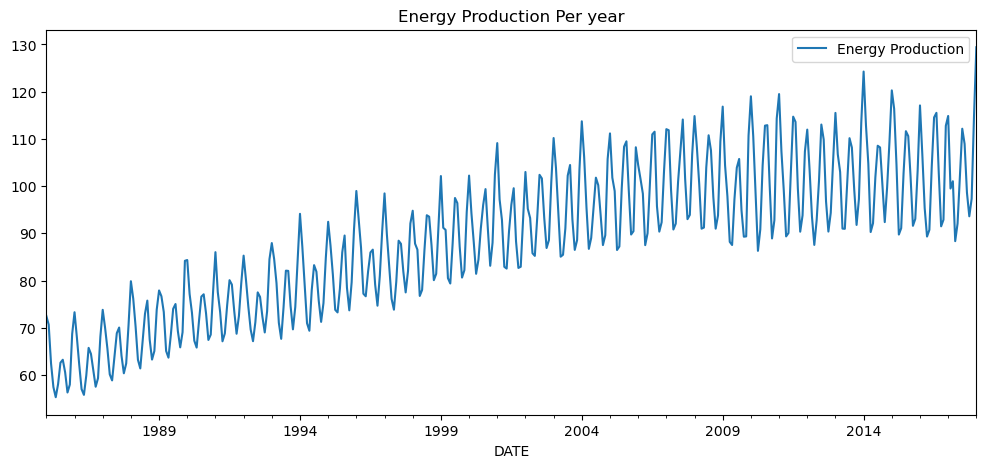

In [6]:
df.plot(figsize=(12,5))
plt.title('Energy Production Per year')

In [7]:
from statsmodels.tsa.stattools import adfuller 

In [8]:
#test for stationary
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics:{}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= .05:
        print("strong evidence against the null hypothesis,reject the null,data has no unit root and its stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

In [9]:
adf_test(df['Energy Production'])

ADF Statistics:-2.2569903500472432
p- value: 0.18621469116586814
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary


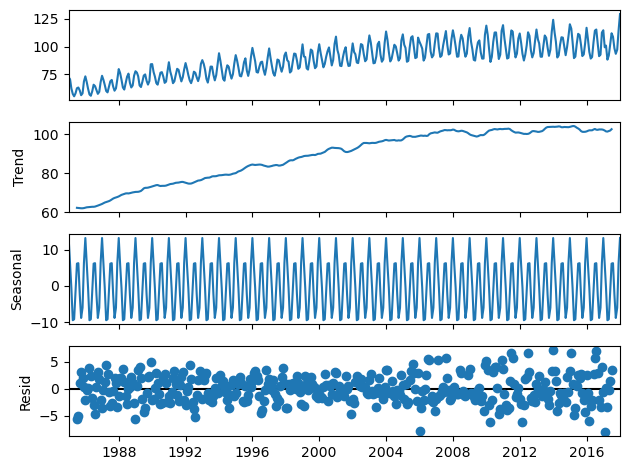

<Figure size 1500x500 with 0 Axes>

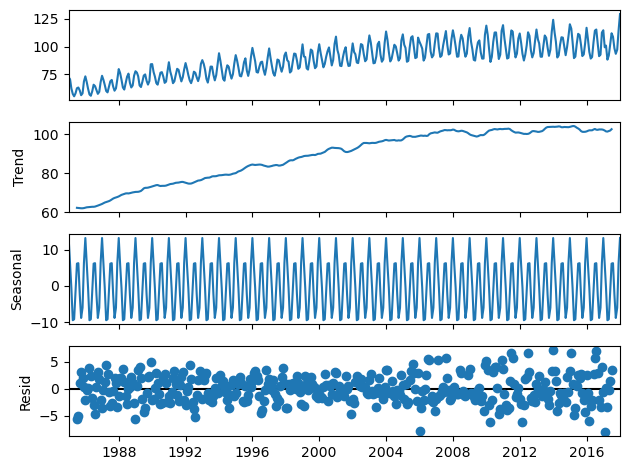

In [10]:
plt.figure(figsize=(15,5))
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(df,model='additive')
result.plot()

In [11]:
!pip install pmdarima

In [12]:
from pmdarima.arima import auto_arima

In [13]:
stepwise_model=auto_arima(df,start_p=1,start_q=1,max_p=3,max_q=3,m=12,start_P=0,seasonal=True,d=1,D=1,trace=True,error_actions='ignore',suppress_warnings=True,stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1785.652, Time=0.32 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2010.162, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1940.101, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1835.298, Time=0.20 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1787.226, Time=0.40 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=1786.885, Time=1.08 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1872.182, Time=0.31 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=1785.329, Time=1.08 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=1770.670, Time=1.14 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=1773.643, Time=0.79 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=1814.635, Time=0.99 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=1835.292, Time=0.95 sec
 ARIMA(2,1,1)(2,1,2)[12]             : AIC=1772.091, Time=2.28 sec
 ARIMA(1,1,2)(2,1,2)[12]

The aic value will allow us how well model fits the data and take into a account complexity of a model so model that have better fit by using fewer features will receive the better aic score then similiar feature that utilizes more feature

In [14]:
train=df.loc['1985-01-01':'2015-12-01']
test=df.loc['2016-01-01':]

In [15]:
len(test)

25

In [16]:
stepwise_model.fit(train)

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True)

In [17]:
future_forecast=stepwise_model.predict(n_periods=25)
future_forecast

2016-01-01    114.718605
2016-02-01    108.941788
2016-03-01    100.826291
2016-04-01     89.610830
2016-05-01     91.529314
2016-06-01    102.392740
2016-07-01    111.944675
2016-08-01    110.732462
2016-09-01    100.363863
2016-10-01     91.742132
2016-11-01     94.902220
2016-12-01    108.110680
2017-01-01    117.744719
2017-02-01    109.523952
2017-03-01    101.625780
2017-04-01     90.151331
2017-05-01     91.959229
2017-06-01    102.362668
2017-07-01    111.432788
2017-08-01    110.294369
2017-09-01    100.076963
2017-10-01     91.887576
2017-11-01     96.155813
2017-12-01    109.316561
2018-01-01    118.844216
Freq: MS, dtype: float64

In [18]:
future_forecast=pd.DataFrame(future_forecast,index=test.index,columns=['Predication'])

In [19]:
future_forecast

,Predication
DATE,
2016-01-01,114.718605
2016-02-01,108.941788
2016-03-01,100.826291
2016-04-01,89.610830
2016-05-01,91.529314
2016-06-01,102.392740
2016-07-01,111.944675
2016-08-01,110.732462
2016-09-01,100.363863


<Axes: xlabel='DATE'>

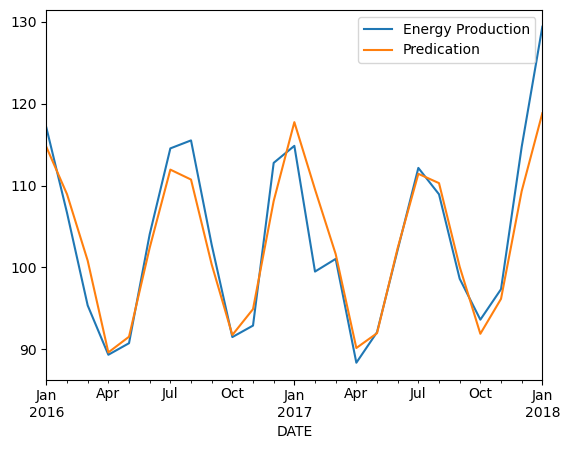

In [20]:
pd.concat([test,future_forecast],axis=1).plot()

In [28]:
df2=pd.concat([test,future_forecast],axis=1)
df2

,Energy Production,Predication
DATE,,
2016-01-01,117.0837,114.718605
2016-02-01,106.6688,108.941788
2016-03-01,95.3548,100.826291
2016-04-01,89.3254,89.610830
2016-05-01,90.7369,91.529314
2016-06-01,104.0375,102.392740
2016-07-01,114.5397,111.944675
2016-08-01,115.5159,110.732462
2016-09-01,102.7637,100.363863


In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [32]:
rmse=sqrt(mean_squared_error(df2['Energy Production'],df2['Predication']))
print(rmse)

3.834672825261473


In [35]:
#forecastoing for the next 10 days
index_future_dates=pd.date_range(start='2018-01-01',end='2018-01-10')
#print(index_future_dates)
pred=stepwise_model.predict(start=len,end=len(future_forecast)+10,type='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)


2018-01-01    114.718605
2018-01-02    108.941788
2018-01-03    100.826291
2018-01-04     89.610830
2018-01-05     91.529314
2018-01-06    102.392740
2018-01-07    111.944675
2018-01-08    110.732462
2018-01-09    100.363863
2018-01-10     91.742132
Freq: D, Name: ARIMA Predictions, dtype: float64


<Axes: >

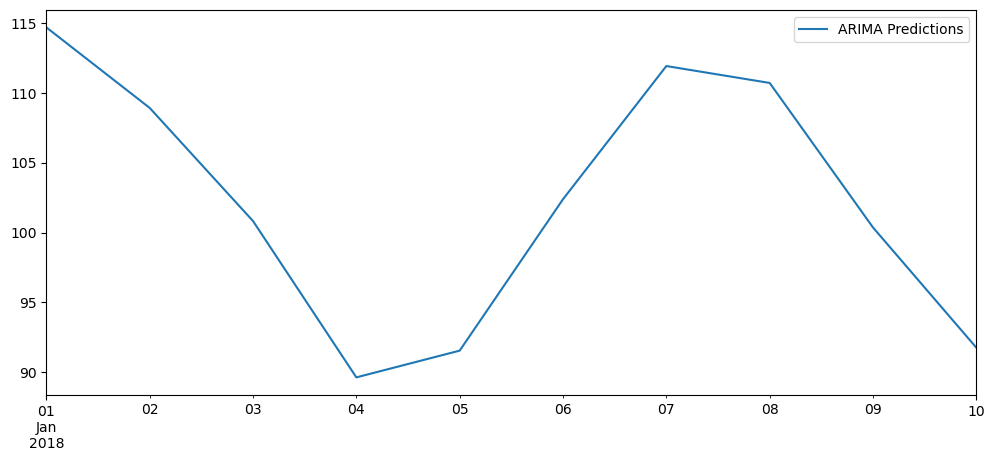

In [36]:
pred.plot(figsize=(12,5),legend=True)

## Double HWES